# Deep Learning
## Individual Assignment (ISB AMPBA B23)
### Part 2: Predicting Customer Churn using Neural Networks

By
| PGID     | Name               |
|----------|-------------------|
| 12420055 | Abhinav Paul      |

#### Package installation and Import statments

In [1]:
# !pip install torch scikit-learn pandas numpy matplotlib warnings datetime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from datetime import datetime
np.random.seed(42)
torch.manual_seed(42)
import warnings
warnings.filterwarnings('ignore') # to remove any unnecessary warning mssage in output

#### 1 & 2. Data Load and EDA

In [3]:
# My local file path were I have dowloaded the data from https://www.kaggle.com/datasets/blastchar/telco-customer-churn
csv_path = '/Users/abhinavpaul/Desktop/Goals/Exec Edu/1. ISB AMPBA/Course Material/Term 3/2. DL/Assignment/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
df = pd.read_csv(csv_path)
print('Shape:', df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Basic info
display(df.describe(include='all'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Looks like datatype format are incorrect for TotalCharges. Fix by coercing to Numeric type

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('\nMissing in TotalCharges after coercion:', df['TotalCharges'].isna().sum())

# Fill missing values by using the monthly charges * Tenure formula
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)
print('\nMissing in TotalCharges after filling with calculated values:', df['TotalCharges'].isna().sum())



Missing in TotalCharges after coercion: 11

Missing in TotalCharges after filling with calculated values: 0


In [8]:
# Duplication check
test = df.copy()
test['cnt'] = 1
test_grp_1 = test.groupby(['customerID']).agg({'cnt': 'sum'}).reset_index()
print("CustomerID level duplicates (Raw data) :",test_grp_1[test_grp_1['cnt'] > 1].shape[0])

CustomerID level duplicates (Raw data) : 0


In [9]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

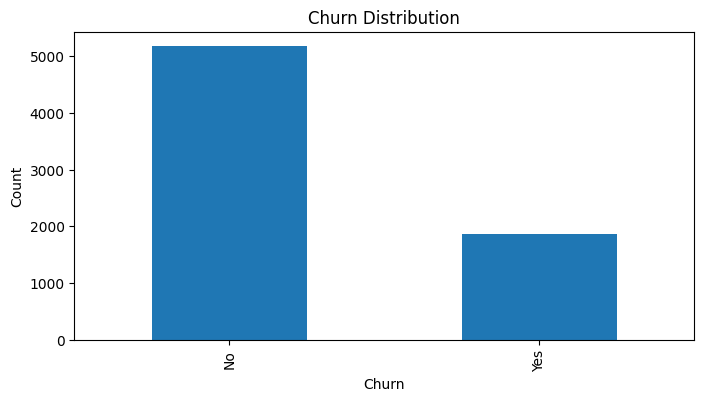

In [10]:
# Churn distribution
fig = plt.figure(figsize=(8, 4))
df['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

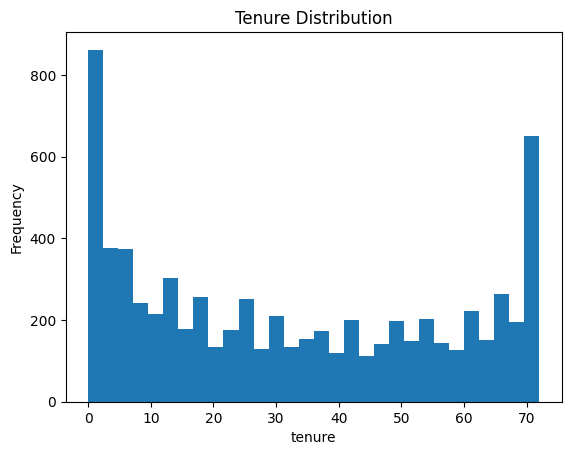

In [11]:
# Tenure distribution
fig = plt.figure()
df['tenure'].plot(kind='hist', bins=30, title='Tenure Distribution')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.show()

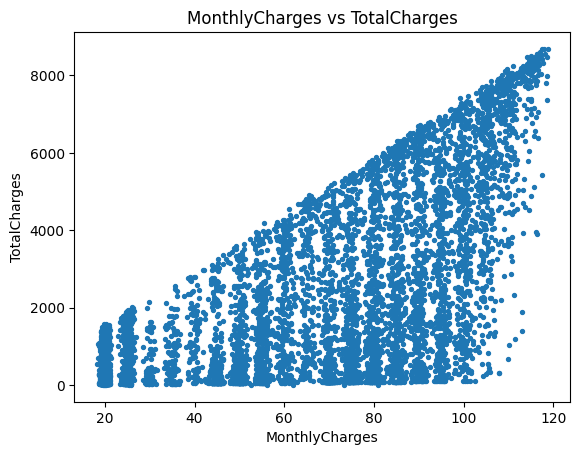

In [12]:
fig = plt.figure()
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], s=8)
plt.title('MonthlyCharges vs TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

#### 3. Pre-processing
- Convert categoricals to one-hot
- Scale numeric features
- Train/Test split (80/20)

In [13]:
# Separate Churn (Our Target variable)
y = (df['Churn'].astype(str).str.lower() == 'yes').astype(int).values

# Drop Customer_ID (thic olumn doesnot give anything to learn to the NN) and Churn (our target) 
# to create feature matrix
Xdf = df.drop(columns=['customerID', 'Churn'])

# Identify categorical and numeric columns
cat_cols = Xdf.select_dtypes(include=['object']).columns.tolist()
num_cols = Xdf.select_dtypes(exclude=['object']).columns.tolist()

# One-hot encode categoricals
X_cat = pd.get_dummies(Xdf[cat_cols], drop_first=True)

# a seperate Df from numerical columns
X_num = Xdf[num_cols].copy()
scaler = StandardScaler() # Scale numeric columns
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=num_cols, index=X_num.index)

# Combine the One-Hot encoded Categorical and scaled numeric columns
X_df = pd.concat([X_num_scaled, X_cat], axis=1)
feature_names = X_df.columns.tolist()
X = X_df.values.astype(np.float32)

print('Final feature matrix shape:', X.shape)
print('Percentage Churn:', (y.sum()/len(y)).round(4))


Final feature matrix shape: (7043, 30)
Percentage Churn: 0.2654


In [14]:
X_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [15]:
X_df.dtypes

SeniorCitizen                            float64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

#### 4. Build NN model (Used Pytorch)

In [16]:
# defining the Architecture of the model by taking in input dimension, hidden layers and dropout rate
def make_model(input_dim, hidden_layers=[128, 64], dropout=0.0):
    layers = []
    prev = input_dim
    for h in hidden_layers:
        layers.append(nn.Linear(prev, h))
        layers.append(nn.ReLU())
        if dropout > 0:
            layers.append(nn.Dropout(dropout))
        prev = h
    layers.append(nn.Linear(prev, 1))
    net = nn.Sequential(*layers)
    return net


#### 5. Train Test Split and Train the model isung Training Dataset

In [17]:
# Train/Val/Test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train/Test sizes:', X_train.shape[0], X_test.shape[0])

Train/Test sizes: 5634 1409


In [18]:
# defining function to Convert numpy arrays to PyTorch tensors
def make_loader(X, y, batch_size=256, shuffle=True):
    tens_X = torch.tensor(X, dtype=torch.float32)
    tens_y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    ds = TensorDataset(tens_X, tens_y)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle)

train_loader = make_loader(X_train, y_train, batch_size=256, shuffle=True)
test_loader = make_loader(X_test, y_test, batch_size=256, shuffle=False)
input_dim = X_train.shape[1]
print('Input Feature count:', input_dim)

Input Feature count: 30


In [19]:
# Set device to GPU if available, otherwise use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define model architecture: 2 hidden layers with 128 and 64 neurons respectively
hidden_layers = [ 128, 64]
dropout = 0.0  # Dropout rate for regularization
lr = 0.001      # Learning rate for optimizer
weight_decay = 0.0001  # L2 regularization strength

# Initialize model and move it to the specified device (GPU/CPU)
model = make_model(input_dim, hidden_layers, dropout).to(device)

# Binary Cross Entropy Loss with Logits (combines sigmoid + BCE in a numerically stable way)
criterion = nn.BCEWithLogitsLoss()

# Adam optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [20]:
#Trains the model for one epoch also made the function in such a way that it can be used for Test evaluation 
# as many steps were common in Training and Evaluation
def one_epoch_model_eval(model, loader, dataset, optimizer, criterion, device='cpu'):
    
    if dataset == 'train':
        model.train()
    else:
        model.eval()
    
    total_loss = 0.0
    ys, ps = [], []
    
    for xb, yb in loader:
        xb = xb.to(device) # Move the data to the specified device
        yb = yb.to(device)
        if dataset == 'train': optimizer.zero_grad() # Zero the gradients before backpropagation only if the dataset is train
        logits = model(xb) # Perform forward pass
        loss = criterion(logits, yb) # Compute the loss
        if dataset == 'train': loss.backward() # Perform backpropagation only if the dataset is train
        if dataset == 'train': optimizer.step() # Update the model parameters only if the dataset is train
        total_loss += loss.item() * xb.size(0) # Update the total loss
        prob = torch.sigmoid(logits).cpu().detach().numpy().ravel() # Get the predicted probabilities and move them to the CPU
        ys.append(yb.cpu().numpy().ravel()) # Append the true labels and predicted probabilities to their respective lists
        ps.append(prob)
    
    y_true = np.concatenate(ys)
    y_prob = np.concatenate(ps)
    
    # Get the predicted labels by thresholding the predicted probabilities 
    # (using the base probability of 0.5 for dicrimination)
    y_pred = (y_prob >= 0.5).astype(int)
    
    # Compute the evaluation metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # return the Loss, Accuracy, Precision, Recall, and F1-Score for the EPOCH 
    return {
        'dataset': dataset,
        'loss': total_loss / len(loader.dataset),
        'acc': acc, 
        'prec': prec, 
        'rec': rec, 
        'f1': f1
    }, y_true, y_prob, y_pred 

In [21]:
# function to plot the curve
def plot_curve(values, title, ylabel):
    fig = plt.figure()
    plt.plot(values)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.show()

Epoch 1/50 | train_loss=0.5684
Epoch 11/50 | train_loss=0.4214
Epoch 21/50 | train_loss=0.4116
Epoch 31/50 | train_loss=0.4010
Epoch 41/50 | train_loss=0.3972


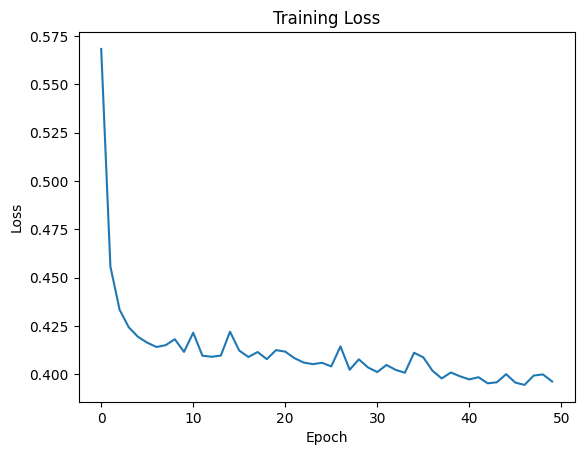

In [22]:
epochs = 50     # Number of training epochs
# Lists to store training and validation losses
train_losses = []
# Training
for epoch in range(epochs):
    # Train for one epoch
    _model_eval_tr, y_tr_true, y_tr_prob, y_tr_pred = one_epoch_model_eval(model
                                            , train_loader
                                            , dataset='train' # passing the type of the dataset
                                            , optimizer=optimizer
                                            , criterion=criterion
                                            , device=device
                                            )
    train_losses.append(_model_eval_tr['loss'])
    if epoch % 10==0:
        print(f"Epoch {epoch+1}/{epochs} | "
              f"{_model_eval_tr['dataset']}_loss={_model_eval_tr['loss']:.4f}"
            )

plot_curve(train_losses, 'Training Loss', 'Loss')

#### 6. Model Evaluation using Test set

In [23]:

# test valuation 
_model_eval_ts, y_ts_true, y_ts_prob, y_ts_pred  = one_epoch_model_eval(model
                                , test_loader
                                , dataset='test' # passing the type of the dataset
                                , optimizer=optimizer
                                , criterion=criterion
                                , device=device
)


In [24]:
# final Test Matrics
print('Final Test metrics:', _model_eval_ts)


Final Test metrics: {'dataset': 'test', 'loss': 0.41876351630290065, 'acc': 0.7955997161107168, 'prec': 0.6580882352941176, 'rec': 0.4786096256684492, 'f1': 0.5541795665634675}


In [25]:
print('\nConfusion Metrix (test):\n')
cm = confusion_matrix(y_ts_true, y_ts_pred)
print(cm)


Confusion Metrix (test):

[[942  93]
 [195 179]]


In [26]:
print('\nClassification report (test):\n')
print(classification_report(y_ts_true, y_ts_pred, target_names=['No Churn','Churn'], zero_division=0))





Classification report (test):

              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1035
       Churn       0.66      0.48      0.55       374

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



With 50 Epoch Training on a 2L NN with nodes 128 and 64 in respective. We are getting 80% accuarcy with the model on Test dataset.

#### 7. Experiment with different Layes and Nuerons combo

In [27]:
NN_combo = [
    {'hidden_layers':[64], 'dropout':0.1},
    {'hidden_layers':[128], 'dropout':0.0},
    {'hidden_layers':[128, 64], 'dropout':0.2},
    {'hidden_layers':[256, 128], 'dropout':0.2},
    {'hidden_layers':[256, 128, 64], 'dropout':0.3},
    {'hidden_layers':[512, 256, 128, 64], 'dropout':0.4},
]

In [28]:

# iteration
results = []
for cfg in NN_combo:
    print("hidden_layers : ",cfg['hidden_layers'], "| Dropout : ", cfg['dropout'])
    model = make_model(input_dim, cfg['hidden_layers'], cfg['dropout']).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_f1 = -1.0
    for epoch in range(20): # 20 Epoch Training for quick iterations
        
        if epoch % 10==0: print(f"Epoch {epoch+1}/20")
        _model_eval_tr, y_tr_true, y_tr_prob, y_tr_pred = one_epoch_model_eval(model
                                            , train_loader
                                            , dataset='train' # passing the type of the dataset
                                            , optimizer=optimizer
                                            , criterion=criterion
                                            , device=device
                                            )
        _model_eval_ts, y_ts_true, y_ts_prob, y_ts_pred = one_epoch_model_eval(model
                                            , test_loader
                                            , dataset='test' # passing the type of the dataset
                                            , optimizer=optimizer
                                            , criterion=criterion
                                            , device=device
                                            )

        if _model_eval_tr['f1'] > best_val_f1:
            best_val_f1 = _model_eval_tr['f1']

    results.append({
        'hidden_layers': cfg['hidden_layers'],
        'dropout': cfg['dropout'],
        'best_val_f1': round(best_val_f1, 4),
        'test_acc': round(_model_eval_ts['acc'], 4),
        'test_prec': round(_model_eval_ts['prec'], 4),
        'test_rec': round(_model_eval_ts['rec'], 4),
        'test_f1': round(_model_eval_ts['f1'], 4),
    })

res_df = pd.DataFrame(results)
res_df.sort_values('test_f1', ascending=False, inplace=True)
res_df.reset_index(drop=True, inplace=True)
res_df


hidden_layers :  [64] | Dropout :  0.1
Epoch 1/20
Epoch 11/20
hidden_layers :  [128] | Dropout :  0.0
Epoch 1/20
Epoch 11/20
hidden_layers :  [128, 64] | Dropout :  0.2
Epoch 1/20
Epoch 11/20
hidden_layers :  [256, 128] | Dropout :  0.2
Epoch 1/20
Epoch 11/20
hidden_layers :  [256, 128, 64] | Dropout :  0.3
Epoch 1/20
Epoch 11/20
hidden_layers :  [512, 256, 128, 64] | Dropout :  0.4
Epoch 1/20
Epoch 11/20


,hidden_layers,dropout,best_val_f1,test_acc,test_prec,test_rec,test_f1
0,"[256, 128]",0.2,0.6206,0.7984,0.6286,0.5882,0.6077
1,"[128, 64]",0.2,0.6189,0.7970,0.6358,0.5508,0.5903
2,"[256, 128, 64]",0.3,0.6169,0.7942,0.6273,0.5535,0.5881
3,[128],0.0,0.6233,0.7949,0.6308,0.5481,0.5866
4,"[512, 256, 128, 64]",0.4,0.6138,0.7949,0.6393,0.5214,0.5744
5,[64],0.1,0.6050,0.7949,0.6451,0.5053,0.5667


With 20 Epoch we are getting max ~80.5% accurate with NN with 1 HL of 128 nuerons